In [1]:
from nanopelican.models import load_experiment
import matplotlib.pyplot as plt

In [2]:
model, history = load_experiment('experiments/nano-2')

DATAHANDLER: {input_shape}


In [3]:
print(model.__dict__)

{'_tracker': <keras.src.utils.tracking.Tracker object at 0x000001F36AF0B390>, '_self_setattr_tracking': True, '_trainable_variables': [], '_non_trainable_variables': [], '_layers': [<DataHandler name=data_handler, built=True>, <Lineq2v2nano name=lineq2v2nano, built=True>, <Lineq2v0nano name=lineq2v0nano, built=True>], '_metrics': [], '_seed_generators': [], '_lock': False, '_auto_config': <keras.src.saving.serialization_lib.SerializableDict object at 0x000001F36AE1EFD0>, 'build': <function PelicanNano.build at 0x000001F36AF18A40>, '_run_eagerly': False, '_jit_compile': False, 'compiled': True, 'loss': <keras.src.losses.losses.BinaryCrossentropy object at 0x000001F36AF0B350>, 'steps_per_execution': 1, '_initial_epoch': None, 'train_function': None, 'test_function': None, 'predict_function': None, '_distribute_strategy': None, '_distribute_reduction_method': None, '_supports_reduce_retracing': True, '_saved_model_inputs_spec': None, '_saved_model_arg_spec': None, '_tracked': ['_inbound_n

In [4]:
for key in history:
    print(key)

loss = history['loss']
acc = history['acc']
val_loss = history['val_loss']
val_acc = history['val_acc']
args = history['args']

acc
loss
val_acc
val_loss
args


In [5]:
for key, val in args.__dict__.items():
    print(key, val)

evaluate_models None
n_hidden 2
n_outputs 1
activation relu
dropout_rate 0.0
use_batchnorm True
data_dir new_data/default
data_format fourvec
feature_key Pmu
label_key is_signal
num_particles 32
num_particles_avg 49
print_summary True
batch_size 512
epochs 20
validation_size 1000
experiment_root experiments
experiment_name nano


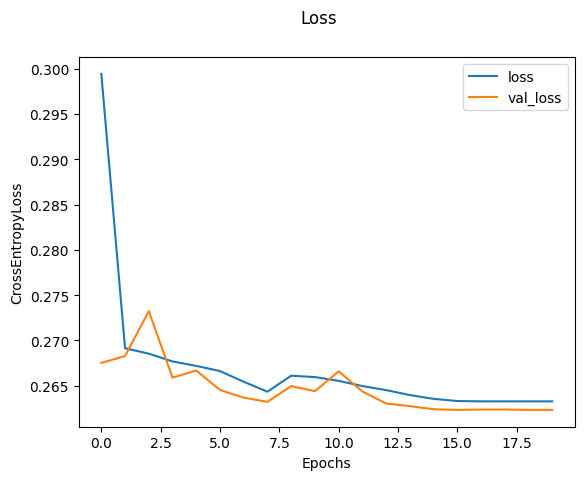

In [6]:
fig, ax = plt.subplots()
ax.plot(loss, label='loss')
ax.plot(val_loss, label='val_loss')
ax.set_ylabel("CrossEntropyLoss")
ax.set_xlabel("Epochs")
fig.suptitle("Loss")
plt.legend()

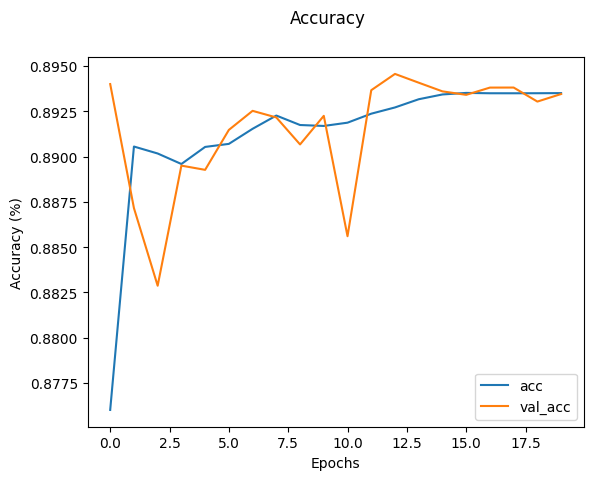

In [7]:
fig, ax = plt.subplots()
ax.plot(acc, label='acc')
ax.plot(val_acc, label='val_acc')
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Epochs")
fig.suptitle("Accuracy")
plt.legend()

In [8]:

optimizer = model.optimizer
conf = optimizer.get_config()['learning_rate']#['config']

In [9]:
import tensorflow as tf
scheduler = optimizer._learning_rate
steps = tf.range(scheduler.epochs*scheduler.steps_per_epoch, dtype=tf.float32, delta=scheduler.steps_per_epoch//10)
learning_rate = tf.map_fn(scheduler, steps)


Text(0.5, 0.98, 'LR schedule')

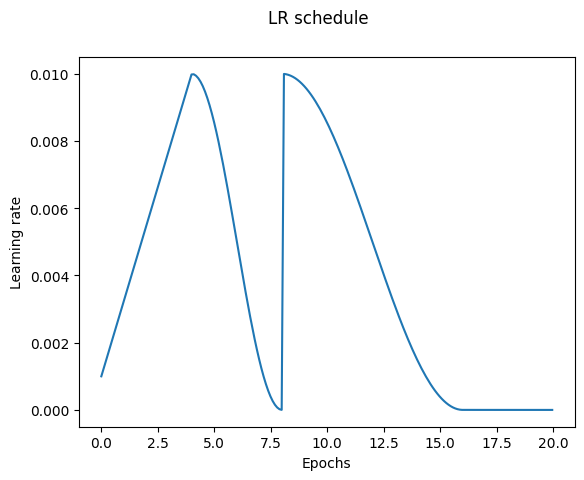

In [10]:
plt.plot(steps / scheduler.steps_per_epoch, learning_rate)
plt.xlabel("Epochs")
plt.ylabel("Learning rate")
plt.suptitle("LR schedule")

In [11]:
import numpy as np
w = model.get_weights()
w = np.concatenate([elem.flatten() for elem in w])
print(w)


[-1.9513826e+01 -3.8434472e-02  5.3124234e-02  1.0668279e-02
 -2.6393175e+00 -2.6272929e+00 -2.6505637e+00 -2.6404915e+00
 -3.1999688e+00 -2.2047891e-01 -1.1194975e-02 -7.0011106e+00
  2.4524639e+00  5.0419438e-01  2.8745487e+00  2.2592010e+00
  1.9587144e+00 -1.7741585e-01  1.7178095e+01  4.6140332e+03
 -1.9732287e+00  7.9512244e-01  1.4778228e-01 -1.0902071e+00
  9.4113111e-01  2.8670149e+00  1.2973795e+00 -7.8289944e-01
 -8.4141535e-01  9.8946877e+00  5.8468544e+01  1.6336906e+02
  1.9171456e+05]


[ 7.0407259e-01  1.1045378e-01 -1.1407734e+01 -1.1421990e+01
 -7.0211571e-01 -1.2425658e+00  9.6760464e-01  9.9075603e+00
  2.1996875e+00 -1.4852539e-01  1.7246685e+01  4.6822183e+03
 -2.1967337e+00 -7.7857471e-01  8.1014943e-01  1.8107696e+00
 -9.6010029e-01  3.2078568e+01  6.1694619e+03]